In [2]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['KaiTi'] #用来正常显示中文标签

In [3]:
# 喷管长度
L=3
# 空气的Gamma
Gamma=1.4
# 空间步长
N=31
# 柯朗数
C=0.5
# 时间步数
K=750

In [4]:
dx=L/(N-1)

In [5]:
x_init=np.linspace(0,L,N).reshape(1,-1)

In [6]:
rou1=np.ones(int(0.5/dx))
rou1

array([1., 1., 1., 1., 1.])

In [7]:
rou2=1-0.366*(np.arange(0.5,1.5,dx)-0.5)
rou2

array([1.    , 0.9634, 0.9268, 0.8902, 0.8536, 0.817 , 0.7804, 0.7438,
       0.7072, 0.6706])

In [8]:
rou3=0.634-0.3879*(np.arange(1.5,3+dx,dx)-1.5)
rou3

array([0.634  , 0.59521, 0.55642, 0.51763, 0.47884, 0.44005, 0.40126,
       0.36247, 0.32368, 0.28489, 0.2461 , 0.20731, 0.16852, 0.12973,
       0.09094, 0.05215])

In [9]:
rou_init=np.concatenate((rou1,rou2,rou3))
print(rou_init)
rou_init.shape

[1.      1.      1.      1.      1.      1.      0.9634  0.9268  0.8902
 0.8536  0.817   0.7804  0.7438  0.7072  0.6706  0.634   0.59521 0.55642
 0.51763 0.47884 0.44005 0.40126 0.36247 0.32368 0.28489 0.2461  0.20731
 0.16852 0.12973 0.09094 0.05215]


(31,)

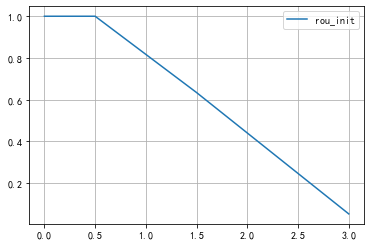

In [10]:
plt.plot(np.linspace(0,L,N),rou_init,label="rou_init")
plt.legend()
plt.grid()
plt.show()

In [11]:
T1=np.ones(int(0.5/dx))
T1

array([1., 1., 1., 1., 1.])

In [12]:
T2=1-0.167*(np.arange(0.5,1.5,dx)-0.5)
T2

array([1.    , 0.9833, 0.9666, 0.9499, 0.9332, 0.9165, 0.8998, 0.8831,
       0.8664, 0.8497])

In [13]:
T3=0.833-0.3507*(np.arange(1.5,3+dx,dx)-1.5)
T3

array([0.833  , 0.79793, 0.76286, 0.72779, 0.69272, 0.65765, 0.62258,
       0.58751, 0.55244, 0.51737, 0.4823 , 0.44723, 0.41216, 0.37709,
       0.34202, 0.30695])

In [14]:
T_init=np.concatenate((T1,T2,T3))
T_init

array([1.     , 1.     , 1.     , 1.     , 1.     , 1.     , 0.9833 ,
       0.9666 , 0.9499 , 0.9332 , 0.9165 , 0.8998 , 0.8831 , 0.8664 ,
       0.8497 , 0.833  , 0.79793, 0.76286, 0.72779, 0.69272, 0.65765,
       0.62258, 0.58751, 0.55244, 0.51737, 0.4823 , 0.44723, 0.41216,
       0.37709, 0.34202, 0.30695])

In [15]:
A_np=pd.Series(1+2.2*(np.linspace(0,L,N)-1.5)**2,index=np.linspace(0,L,N))

In [16]:
V_init=0.59/rou_init/A_np

In [17]:
# 初值
A=pd.DataFrame(A_np,index=np.linspace(0,L,N)).T.iloc[-1]
lnA=np.log(A)

V_result=pd.DataFrame(V_init,index=np.linspace(0,L,N)).T

rou_result=pd.DataFrame(rou_init,index=np.linspace(0,L,N)).T
T_result=pd.DataFrame(T_init,index=np.linspace(0,L,N)).T
V_result=pd.DataFrame(V_init,index=np.linspace(0,L,N)).T

# rou_result=pd.DataFrame(1-0.3146*x_init,columns=np.linspace(0,L,N))
# T_result=pd.DataFrame(1-0.2314*x_init,columns=np.linspace(0,L,N))
# V_result=pd.DataFrame((0.1+1.09*x_init)*np.sqrt(1-0.2314*x_init),columns=np.linspace(0,L,N))

p_result=rou_result*T_result

In [18]:
U1_result=rou_result*A
U2_result=rou_result*A*V_result
U3_result=rou_result*(T_result/(Gamma-1)+Gamma/2*V_result*V_result)*A

In [32]:
K = 1
for k in range(K):
    U1 = U1_result.iloc[-1]
    U2 = U2_result.iloc[-1]
    U3 = U3_result.iloc[-1]
    print(U1)
    print(U2)
    print(U3)

    rou=rou_result.iloc[-1]
    T=T_result.iloc[-1]
    V=V_result.iloc[-1]

    F1=U2
    F2=U2*U2/U1+(Gamma-1)/Gamma*(U3-Gamma/2*U2*U2/U1)
    F3=Gamma*U2*U3/U1-Gamma*(Gamma-1)/2*U2*U2*U2/U1/U1
    J2=rou*T*(A.shift(-1)-A)/Gamma/dx
    print("original Fs") 
    print(F1) 
    print(F2)
    print(F3)

    dt = (C * dx / (V + np.sqrt(T))).min()
    
    
    # 预估步
    dU1_est=-(F1.shift(-1)-F1)/dx
    dU2_est=-(F2.shift(-1)-F2)/dx+J2
    dU3_est=-(F3.shift(-1)-F3)/dx
    print("pre_dUs")
    print(dU1_est)
    print(dU2_est)
    print(dU3_est)

    U1_est = U1 + dU1_est * dt
    U2_est = U2 + dU2_est * dt
    U3_est = U3 + dU3_est * dt
    print("pre_Us")
    print(U1_est)
    print(U2_est)
    print(U3_est)
    
   
    rou_est=U1_est/A
    V_est=U2_est/U1_est
    T_est=(Gamma-1)*(U3_est/U1_est-Gamma/2*V_est*V_est)

    F1_est=U2_est
    F2_est=U2_est*U2_est/U1_est+(Gamma-1)/Gamma*(U3_est-Gamma/2*U2_est*U2_est/U1_est)
    F3_est=Gamma*U2_est*U3_est/U1_est-Gamma*(Gamma-1)/2*U2_est*U2_est*U2_est/U1_est/U1_est

    
    # 校正步
    dU1_rev=-(F1_est-F1_est.shift(1))/dx
    dU2_rev=-(F2_est-F2_est.shift(1))/dx+rou_est*T_est*(A-A.shift(1))/Gamma/dx
    dU3_rev=-(F3_est-F3_est.shift(1))/dx

    dU1_av = (dU1_est + dU1_rev) / 2
    dU2_av = (dU2_est + dU2_rev) / 2
    dU3_av = (dU3_est + dU3_rev) / 2

    U1_rev = U1 + dU1_av * dt
    U2_rev = U2 + dU2_av * dt
    U3_rev = U3 + dU3_av * dt

    
    # 边界条件
    U1_rev.iloc[0] = A.iloc[0]
    U1_rev.iloc[-1] = U1_rev.iloc[-2] * 2 - U1_rev.iloc[-3]

    U2_rev.iloc[0] = U2_rev.iloc[1] * 2 - U2_rev.iloc[2]
    U2_rev.iloc[-1] = U2_rev.iloc[-2] * 2 - U2_rev.iloc[-3]
    
    V_tmp=U2_rev.iloc[0]/U1_rev.iloc[0]
    U3_rev.iloc[0] = U1_rev.iloc[0]*(1/(Gamma-1)+Gamma/2*V_tmp*V_tmp)
    U3_rev.iloc[-1] = U3_rev.iloc[-2] * 2 - U3_rev.iloc[-3]
    
    # 回代求解rou，V，T，p
    rou_rev=U1_rev/A
    V_rev=U2_rev/U1_rev
    T_rev=(Gamma-1)*(U3_rev/U1_rev-Gamma/2*V_rev*V_rev)
    p_rev=rou_rev * T_rev

    # 将结果拼接到表格下行
    rou_rev.name = rou_result.index[-1] + dt
    rou_result = rou_result.append(rou_rev)

    V_rev.name = V_result.index[-1] + dt
    V_result = V_result.append(V_rev)

    T_rev.name = T_result.index[-1] + dt
    T_result = T_result.append(T_rev)

    p_rev.name = p_result.index[-1] + dt
    p_result = p_result.append(p_rev)
    
    U1_rev.name=U1_result.index[-1]+dt
    U1_result=U1_result.append(U1_rev)
    
    U2_rev.name=U2_result.index[-1]+dt
    U2_result=U2_result.append(U2_rev)
    
    U3_rev.name=U3_result.index[-1]+dt
    U3_result=U3_result.append(U3_rev)


0.0    5.950000
0.1    5.305546
0.2    4.704578
0.3    4.146865
0.4    3.632142
0.5    3.160448
0.6    2.731601
0.7    2.344762
0.8    1.999474
0.9    1.695010
1.0    1.430355
1.1    1.203945
1.2    1.014006
1.3    0.858056
1.4    0.733207
1.5    0.650882
1.6    0.559196
1.7    0.502441
1.8    0.459578
1.9    0.427160
2.0    0.402399
2.1    0.383262
2.2    0.368209
2.3    0.356239
2.4    0.346487
2.5    0.338565
2.6    0.331825
2.7    0.326361
2.8    0.321381
2.9    0.317528
3.0    0.313674
Name: 15.760015418906098, dtype: float64
0.0    0.585006
0.1    0.585148
0.2    0.585291
0.3    0.585351
0.4    0.585454
0.5    0.585338
0.6    0.585078
0.7    0.585002
0.8    0.585112
0.9    0.585234
1.0    0.585366
1.1    0.585469
1.2    0.585554
1.3    0.585523
1.4    0.585458
1.5    0.585212
1.6    0.585043
1.7    0.584859
1.8    0.584737
1.9    0.584689
2.0    0.584679
2.1    0.584716
2.2    0.584743
2.3    0.584821
2.4    0.584837
2.5    0.584957
2.6    0.584923
2.7    0.585106
2.8    0.585003

In [20]:
Ma_result=V_result/np.sqrt(T_result)

In [21]:
T_result[0.4].values.shape

(751,)

In [22]:
len(range(K+1))

751

In [23]:
p_result[0.4].values.shape

(751,)

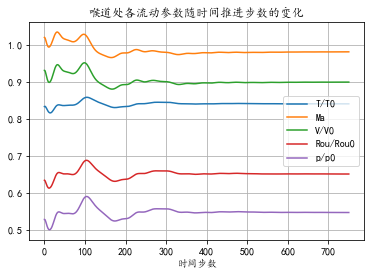

In [24]:

plt.plot(range(K+1),T_result[1.5].values,label="T/T0")
plt.plot(range(K+1),Ma_result[1.5].values,label="Ma")
plt.plot(range(K+1),V_result[1.5].values,label="V/V0")
plt.plot(range(K+1),rou_result[1.5].values,label="Rou/Rou0")
plt.plot(range(K+1),p_result[1.5].values,label="p/p0")

# plt.plot(range(K+1),U1_result[1.5].values,label="U1")
# plt.plot(range(K+1),U2_result[1.5].values,label="U2")
# plt.plot(range(K+1),U3_result[1.5].values,label="U3")
# plt.plot(range(K+1),F_result[1.5].values,label="F")

plt.xlabel('时间步数')
plt.title('喉道处各流动参数随时间推进步数的变化')
plt.grid()
plt.legend()
plt.show()


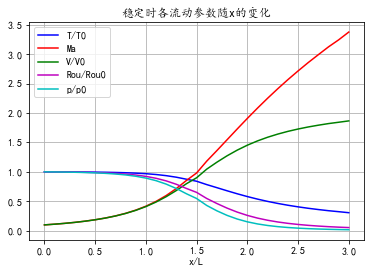

In [25]:
colors=['b','r','g','m','c']


plt.plot(np.linspace(0,L,N),T_result.iloc[-1],label="T/T0",color=colors[0])
plt.plot(np.linspace(0,L,N),Ma_result.iloc[-1],label="Ma",color=colors[1])
plt.plot(np.linspace(0,L,N),V_result.iloc[-1],label="V/V0",color=colors[2])
plt.plot(np.linspace(0,L,N),rou_result.iloc[-1],label="Rou/Rou0",color=colors[3])
plt.plot(np.linspace(0,L,N),p_result.iloc[-1],label="p/p0",color=colors[4])
plt.xlabel('x/L')
plt.title('稳定时各流动参数随x的变化')
plt.grid()
plt.legend()

# plt.scatter(np.linspace(0,L,N),T_exact,color=colors[0],s=10)
# plt.scatter(np.linspace(0,L,N),Ma_exact,color=colors[1],s=10)
# plt.scatter(np.linspace(0,L,N),V_exact,color=colors[2],s=10)
# plt.scatter(np.linspace(0,L,N),rou_exact,color=colors[3],s=10)
# plt.scatter(np.linspace(0,L,N),p_exact,color=colors[4],s=10)
plt.show()